In [1020]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import time
import seaborn as sns
import pickle
from sklearn.metrics import accuracy_score 
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import defaultdict
from sklearn.naive_bayes import GaussianNB
import copy

Dataframes for tph_f with no window features

In [3]:
df1 = pd.read_csv("FrameFeatures_tph1_LR_f_1_CLEAN.csv")
df2 = pd.read_csv("FrameFeatures_tph1_LR_f_6_CLEAN.csv")
df4 = pd.read_csv("FrameFeatures_tph1_LR_f_7_CLEAN.csv")
df3 = pd.read_csv("FrameFeatures_tph1_LR_f_8_CLEAN.csv")

In [4]:
df1.drop(['imagenumber'], axis=1, inplace=True)
df2.drop(['imagenumber'], axis=1, inplace=True)
df3.drop(['imagenumber'], axis=1, inplace=True)
df4.drop(['imagenumber'], axis=1, inplace=True)

In [5]:
def setupcolumns(df, previous_days, future_days, alternate=1):  
    df1 = df.copy()

    # previous days
    prev = []
    for i in range(1, alternate*(previous_days)+1, alternate):
        tmp = df.shift(i)
        tmp.rename(columns=lambda x: x+'_'+str(-i), inplace=True)
        prev.append(tmp)
        
    # future days
    fut = []
    for i in range(-1, -(alternate*(future_days)+1), -alternate):
        tmp = df.shift(-i)
        tmp.rename(columns=lambda x: x+'_'+str(-i), inplace=True)
        fut.append(tmp)
            
    df1 = pd.concat([df1]+prev+fut, axis=1)    
    df1 = df1.replace([np.inf,-np.inf],np.nan)
    df1 = df1.dropna()   
    return df1

In [2]:
# with open("df1_plus5.pickle", "rb") as input_file:
#     df1_plus5 = pickle.load(input_file)
# with open("df1_plus30_2.pickle", "rb") as input_file:
#     df1_plus30_2 = pickle.load(input_file)
# with open("df2_plus5.pickle", "rb") as input_file:
#     df2_plus5 = pickle.load(input_file)
# with open("df2_plus30_2.pickle", "rb") as input_file:
#     df2_plus30_2 = pickle.load(input_file)
# with open("df3_plus5.pickle", "rb") as input_file:
#     df3_plus5 = pickle.load(input_file)
# with open("df3_plus30_2.pickle", "rb") as input_file:
#     df3_plus30_2 = pickle.load(input_file)
# with open("df4_plus5.pickle", "rb") as input_file:
#     df4_plus5 = pickle.load(input_file)
# with open("df4_plus30_2.pickle", "rb") as input_file:
#     df4_plus30_2 = pickle.load(input_file)

In [7]:
df_train = pd.concat([df1, df2, df3], ignore_index=True)
df_test = df4

df_train_plus5 = pd.concat([df1_plus5, df2_plus5, df3_plus5], ignore_index=True)
df_test_plus5 = df4_plus5

df_train_plus30_2 = pd.concat([df1_plus30_2, df2_plus30_2, 
                               df3_plus30_2], ignore_index=True)
df_test_plus30_2 = df4_plus30_2

In [8]:
X_train, y_train = df_train.iloc[:, 0:len(df_train.columns)-1], \
                                df_train.iloc[:, len(df_train.columns)-1]
X_test, y_test =  df_test.iloc[:, 0:len(df_test.columns)-1], \
                                df_test.iloc[:, len(df_test.columns)-1]
    
X_train_plus5, y_train_plus5 = df_train_plus5.iloc[:, 0:len(df_train_plus5.columns)-1], \
                                df_train_plus5.iloc[:, len(df_train_plus5.columns)-1]
X_test_plus5, y_test_plus5 =  df_test_plus5.iloc[:, 0:len(df_test_plus5.columns)-1], \
                                df_test_plus5.iloc[:, len(df_test_plus5.columns)-1]
    
X_train_plus30_2, y_train_plus30_2 = df_train_plus30_2.iloc[:, 0:len(df_train_plus30_2.columns)-1], \
                                df_train_plus30_2.iloc[:, len(df_train_plus30_2.columns)-1]
X_test_plus30_2, y_test_plus30_2 =  df_test_plus30_2.iloc[:, 0:len(df_test_plus30_2.columns)-1], \
                                df_test_plus30_2.iloc[:, len(df_test_plus30_2.columns)-1]

In [9]:
for i in X_train_plus5.columns:
    if 'annotation' in i:
        X_train_plus5.drop([i], axis=1, inplace=True)

for i in X_test_plus5.columns:
    if 'annotation' in i:
        X_test_plus5.drop([i], axis=1, inplace=True)
        
for i in X_train_plus30_2.columns:
    if 'annotation' in i:
        X_train_plus30_2.drop([i], axis=1, inplace=True)
        
for i in X_test_plus30_2.columns:
    if 'annotation' in i:
        X_test_plus30_2.drop([i], axis=1, inplace=True)

In [1]:
# with open('X_train_plus5.pickle', 'wb') as handle:
#     pickle.dump(X_train_plus5, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('y_train_plus5.pickle', 'wb') as handle:
#     pickle.dump(y_train_plus5, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('X_test_plus5.pickle', 'wb') as handle:
#     pickle.dump(X_test_plus5, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('y_test_plus5.pickle', 'wb') as handle:
#     pickle.dump(y_test_plus5, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('X_train_plus30_2.pickle', 'wb') as handle:
#     pickle.dump(X_train_plus30_2, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('y_train_plus30_2.pickle', 'wb') as handle:
#     pickle.dump(y_train_plus30_2, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('X_test_plus30_2.pickle', 'wb') as handle:
#     pickle.dump(X_test_plus30_2, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('y_test_plus30_2.pickle', 'wb') as handle:
#     pickle.dump(y_test_plus30_2, handle, protocol=pickle.HIGHEST_PROTOCOL)

#### Quick visual correlation analysis

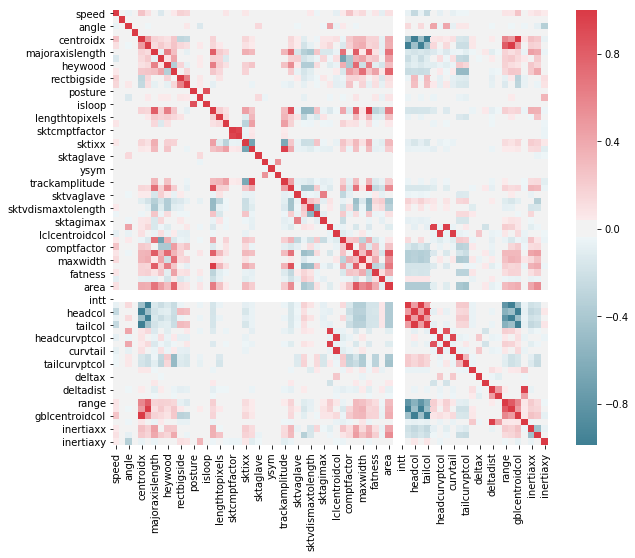

In [51]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [56]:
# for i in X_train.columns:
#     X_train[i].hist()
#     plt.title(i)
#     plt.show()

#### PCA Explorations

Do pc1 vs pc2 for raw data set plus tomek links removed, plus cluster centers

In [10]:
# scaling data to (0,1)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)  
X_test_std = scaler.transform(X_test)

pca = PCA(n_components=10)
pca.fit(X_train_std)
pca_X_train_std = pca.transform(X_train_std)
pca_X_test_std = pca.transform(X_test_std)

# scaling data to (0,1)
scaler.fit(X_train_plus5)
X_train_plus5_std = scaler.transform(X_train_plus5)  
X_test_plus5_std = scaler.transform(X_test_plus5)
pca.fit(X_train_plus5_std)
pca_X_train_plus5_std = pca.transform(X_train_plus5_std)
pca_X_test_plus5_std = pca.transform(X_test_plus5_std)

# scaling data to (0,1)
scaler.fit(X_train_plus30_2)
X_train_plus30_2_std = scaler.transform(X_train_plus30_2)  
X_test_plus30_2_std = scaler.transform(X_test_plus30_2)
pca.fit(X_train_plus30_2_std)
pca_X_train_plus30_2_std = pca.transform(X_train_plus30_2_std)
pca_X_test_plus30_2_std = pca.transform(X_test_plus30_2_std)

C:\Users\Charlie\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [42]:
# with open('pca_X_train_plus5_std.pickle', 'wb') as handle:
#     pickle.dump(pca_X_train_plus5_std, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('pca_X_test_plus5_std.pickle', 'wb') as handle:
#     pickle.dump(pca_X_test_plus5_std, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('pca_X_train_plus30_2_std.pickle', 'wb') as handle:
#     pickle.dump(pca_X_train_plus30_2_std, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('pca_X_test_plus30_2_std.pickle', 'wb') as handle:
#     pickle.dump(pca_X_test_plus30_2_std, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
# getting colors associated to each label type
target_labels = np.unique(y_train)
label_color_dict = {'Forward-NTD':'red', 'Forward-Sharp':"yellow", 'ReverseLong':'blue', 'ReverseShort':'green', 'Stop':'black'}
cvec = [label_color_dict[label] for label in y_train]

##### X_train and X_test

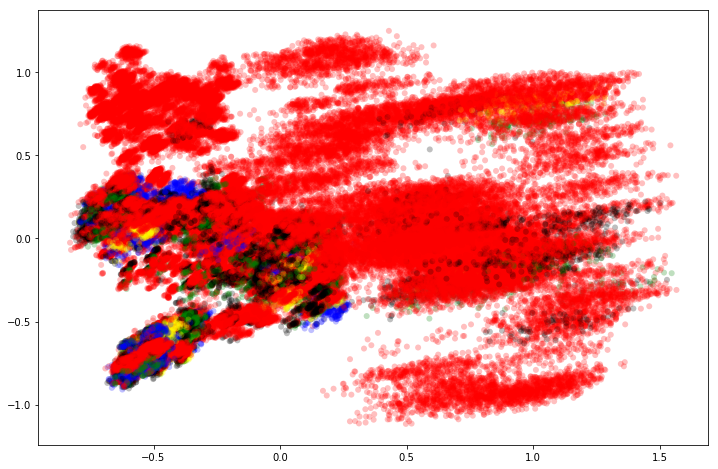

In [561]:
# Training set - primary principal components
plt.figure(figsize=(12,8))
plt.scatter(pca_X_train_std[:,0], pca_X_train_std[:,1], 
            c=cvec, edgecolor='', alpha=0.25)
plt.show()

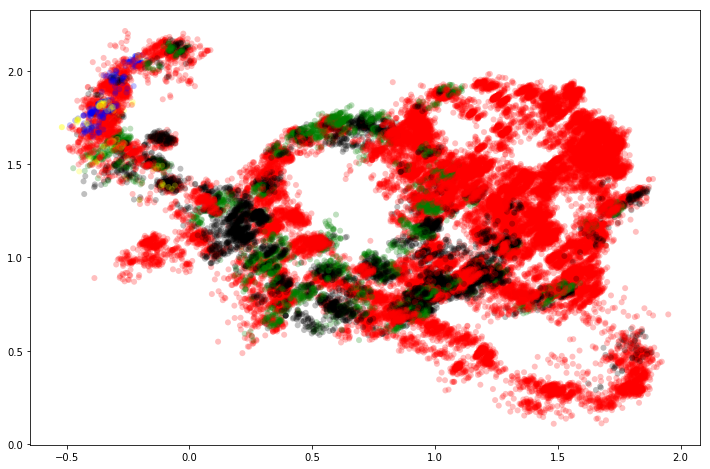

In [562]:
# Testing set - primary principal components
plt.figure(figsize=(12,8))
plt.scatter(pca_X_test_std[:,0], pca_X_test_std[:,1], 
            c=cvec, edgecolor='', alpha=0.25)
plt.show()

##### X_train_plus5 and X_test_plus5

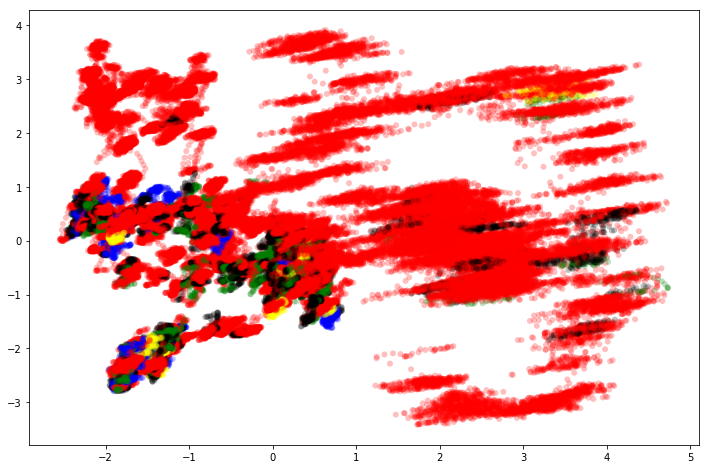

In [563]:
# Training set - primary principal components
plt.figure(figsize=(12,8))
plt.scatter(pca_X_train_plus5_std[:,0], pca_X_train_plus5_std[:,1], 
            c=cvec, edgecolor='', alpha=0.25)
plt.show()

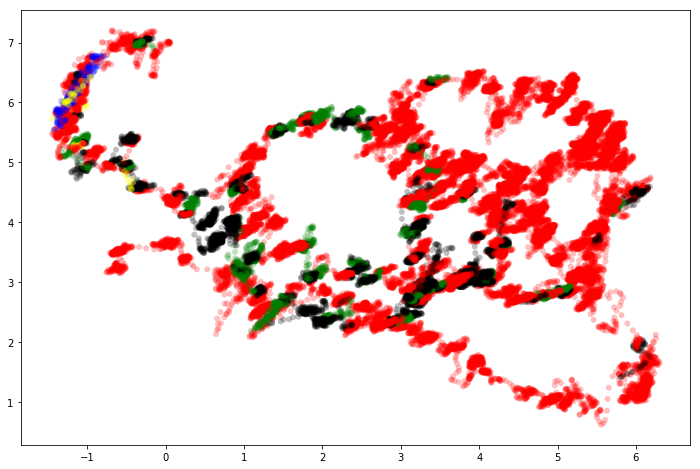

In [564]:
# Testing set - primary principal components
plt.figure(figsize=(12,8))
plt.scatter(pca_X_test_plus5_std[:,0], pca_X_test_plus5_std[:,1], 
            c=cvec, edgecolor='', alpha=0.25)
plt.show()

##### X_train_plus30_2 and X_test_plus30_2

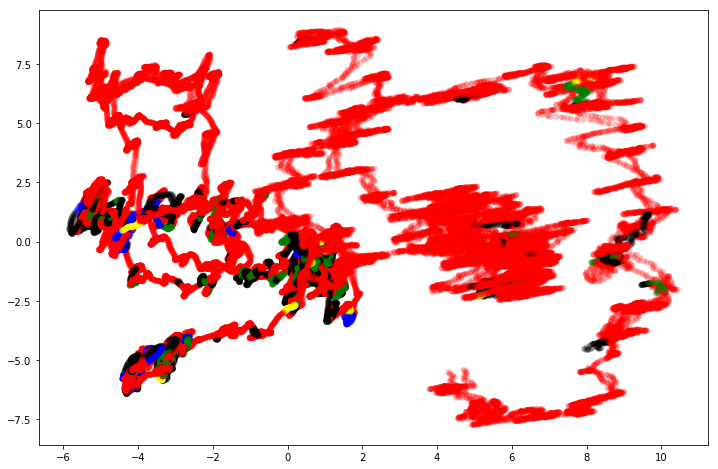

In [567]:
# Training set - primary principal components
plt.figure(figsize=(12,8))
plt.scatter(pca_X_train_plus30_2_std[:,0], pca_X_train_plus30_2_std[:,1], 
            c=cvec, edgecolor='', alpha=0.25)
plt.show()

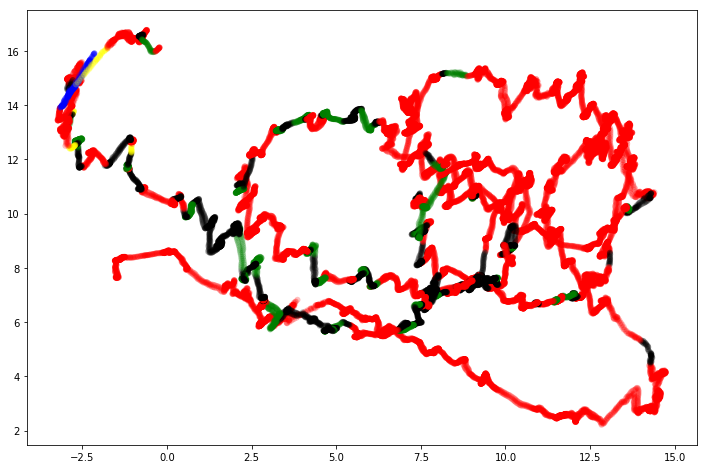

In [566]:
# Testing set - primary principal components
plt.figure(figsize=(12,8))
plt.scatter(pca_X_test_plus30_2_std[:,0], pca_X_test_plus30_2_std[:,1], 
            c=cvec, edgecolor='', alpha=0.25)
plt.show()

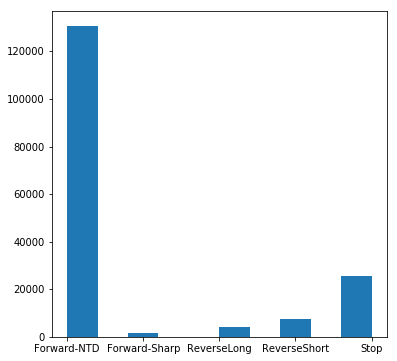

In [559]:
figure(figsize=(6,6))
plt.hist(np.append(y_train, y_test))

# plt.xlabel = 'Movement State'
# plt.title('Movement Distribution: tph1 Mutants')
plt.show()

#### Rotation Forest Algorithm (credit to joshloyal for the rotation forest code)

In [19]:
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree._tree import DTYPE
from sklearn.ensemble.forest import ForestClassifier
from sklearn.utils import resample, gen_batches, check_random_state
from sklearn.utils.extmath import fast_dot
from sklearn.decomposition import PCA, KernelPCA

# from _exceptions import NotFittedError

def random_feature_subsets(array, batch_size, random_state=1234):
    """ Generate K subsets of the features in X """
    random_state = check_random_state(random_state)
    features = range(array.shape[1])
    random_state.shuffle(features)
    for batch in gen_batches(len(features), batch_size):
        yield features[batch]


class RotationTreeClassifier(DecisionTreeClassifier):
    def __init__(self,
                 n_features_per_subset=3,
                 rotation_algo='pca',
                 criterion="gini",
                 splitter="best",
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 min_weight_fraction_leaf=0.,
                 max_features=1.0,
                 random_state=None,
                 max_leaf_nodes=None,
                 class_weight=None,
                 presort=False):

        self.n_features_per_subset = n_features_per_subset
        self.rotation_algo = rotation_algo

        super(RotationTreeClassifier, self).__init__(
            criterion=criterion,
            splitter=splitter,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            min_weight_fraction_leaf=min_weight_fraction_leaf,
            max_features=max_features,
            max_leaf_nodes=max_leaf_nodes,
            class_weight=class_weight,
            random_state=random_state,
            presort=presort)

    def rotate(self, X):
        if not hasattr(self, 'rotation_matrix'):
            raise NotFittedError('The estimator has not been fitted')

        return np.dot(X, self.rotation_matrix)

    def pca_algorithm(self):
        """ Deterimine PCA algorithm to use. """
        if self.rotation_algo == 'kernal_rbf':
            return KernelPCA(kernel='rbf')
        elif self.rotation_algo == 'pca':
            return PCA()
        else:
            raise ValueError("`rotation_algo` must be either "
                             "'pca' or 'randomized'.")

    def _fit_rotation_matrix(self, X):
        random_state = check_random_state(self.random_state)
        n_samples, n_features = X.shape
        self.rotation_matrix = np.zeros((n_features, n_features),
                                        dtype=np.float32)
        for i, subset in enumerate(
                random_feature_subsets(X, self.n_features_per_subset,
                                       random_state=self.random_state)):
            # take a 75% bootstrap from the rows 
            x_sample = resample(X, n_samples=int(n_samples*0.75),
                                random_state=10*i)
            pca = self.pca_algorithm()
            pca.fit(x_sample[:, subset])
            self.rotation_matrix[np.ix_(subset, subset)] = pca.components_

    def fit(self, X, y, sample_weight=None, check_input=True):
        self._fit_rotation_matrix(X)
        super(RotationTreeClassifier, self).fit(self.rotate(X), y,
                                                sample_weight, check_input)

    def predict_proba(self, X, check_input=True):
        return  super(RotationTreeClassifier, self).predict_proba(self.rotate(X),
                                                                  check_input)

    def predict(self, X, check_input=True):
        return super(RotationTreeClassifier, self).predict(self.rotate(X),
                                                           check_input)

    def apply(self, X, check_input=True):
        return super(RotationTreeClassifier, self).apply(self.rotate(X),
                                                         check_input)

    def decision_path(self, X, check_input=True):
        return super(RotationTreeClassifier, self).decision_path(self.rotate(X),
                                                                 check_input)

class RotationForestClassifier(ForestClassifier):
    def __init__(self,
                 n_estimators=10,
                 criterion="gini",
                 n_features_per_subset=3,
                 rotation_algo='pca',
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 min_weight_fraction_leaf=0.,
                 max_features=1.0,
                 max_leaf_nodes=None,
                 bootstrap=False,
                 oob_score=False,
                 n_jobs=1,
                 random_state=None,
                 verbose=0,
                 warm_start=False,
                 class_weight=None):
        super(RotationForestClassifier, self).__init__(
            base_estimator=RotationTreeClassifier(),
            n_estimators=n_estimators,
            estimator_params=("n_features_per_subset", "rotation_algo",
                              "criterion", "max_depth", "min_samples_split",
                              "min_samples_leaf", "min_weight_fraction_leaf",
                              "max_features", "max_leaf_nodes",
                              "random_state"),
            bootstrap=bootstrap,
            oob_score=oob_score,
            n_jobs=n_jobs,
            random_state=random_state,
            verbose=verbose,
            warm_start=warm_start,
            class_weight=class_weight)

        self.n_features_per_subset = n_features_per_subset
        self.rotation_algo = rotation_algo
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.min_weight_fraction_leaf = min_weight_fraction_leaf
        self.max_features = max_features
        self.max_leaf_nodes = max_leaf_nodes

### Examining different feature sets using PCA, NB and Simulated Annealing

In [964]:
def nb_f1(feats, xtrn, xtst, ytrn, ytst):
    slicer = np.nonzero(feats)[0]
    nb_clf.fit(xtrn[:, slicer], ytrn)
    yhat = nb_clf.predict(xtst[:, slicer])
    return f1_score(ytst, yhat, average="macro")

def randomly_update_features(feats, num):
    new_feats = np.copy(feats)
    for i in range(num):
        choice = random.randrange(0, 9)
        new_feats[choice] += -1
        new_feats = abs(new_feats)
    if not np.all(new_feats==0):
        return new_feats
    else:
        return randomly_update_features(feats, random.randrange(1,10))

In [966]:
random.seed(0)
nb_clf = GaussianNB()
feats = np.zeros(pca_X_train_plus30_2_std.shape[1])
feat_set = randomly_update_features(feats, 5)
f1 = nb_f1(feat_set, pca_X_train_plus30_2_std, pca_X_test_plus30_2_std, y_train_plus30_2, y_test_plus30_2)

min_steps=0
step=0
steps=[]

max_feat_set = feat_set
max_f1 = f1

T = 1000
while T > 1:
    feat_set1 = randomly_update_features(feats, random.randrange(1,3))
    f1_1 = nb_f1(feat_set1, pca_X_train_plus30_2_std, pca_X_test_plus30_2_std, 
                 y_train_plus30_2, y_test_plus30_2)
    u = random.uniform(0,1)
    alpha = exp(1.0/T * (f1_1 - f1))
    print step, 'T:',int(T), 'f1:',f1, 'f1_1:', f1_1, 'f1_1>f1:',f1_1 > f1
    if u <= alpha:
        step += 1
        feat_set = feat_set1
        f1 = f1_1
        if f1 > max_f1:
            print 'NEW MAX'
            max_feat_set = feat_set
            max_f1 = f1
        steps.append((step, f1))
        if step%25 == 0:
            f1 = max_f1
            feat_set = max_feat_set 
    T *= 1-0.01

0 T: 1000 f1: 0.19491490703782435 f1_1: 0.2441592609206969 f1_1>f1: True
NEW MAX
1 T: 990 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
2 T: 980 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
3 T: 970 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
4 T: 960 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
5 T: 950 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
6 T: 941 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
7 T: 932 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
8 T: 922 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
9 T: 913 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
10 T: 904 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
11 T: 895 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
12 T: 886 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
13 T: 877 f1: 0.2441592609206969 f1_1: 0.24415926092

112 T: 324 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
113 T: 321 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
114 T: 317 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
115 T: 314 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
116 T: 311 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
117 T: 308 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
118 T: 305 f1: 0.2441592609206969 f1_1: 0.25196812075498426 f1_1>f1: True
119 T: 302 f1: 0.25196812075498426 f1_1: 0.2441592609206969 f1_1>f1: False
120 T: 299 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
121 T: 296 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
122 T: 293 f1: 0.2441592609206969 f1_1: 0.14905099095207125 f1_1>f1: False
123 T: 290 f1: 0.14905099095207125 f1_1: 0.2441592609206969 f1_1>f1: True
124 T: 287 f1: 0.2441592609206969 f1_1: 0.22458905792788936 f1_1>f1: False
125 T: 284 f1: 0.25196812075498426 

224 T: 105 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
225 T: 104 f1: 0.25196812075498426 f1_1: 0.2441592609206969 f1_1>f1: False
226 T: 103 f1: 0.2441592609206969 f1_1: 0.13138695247015017 f1_1>f1: False
227 T: 102 f1: 0.13138695247015017 f1_1: 0.2441592609206969 f1_1>f1: True
228 T: 101 f1: 0.2441592609206969 f1_1: 0.13473269170970661 f1_1>f1: False
229 T: 100 f1: 0.13473269170970661 f1_1: 0.2441592609206969 f1_1>f1: True
230 T: 99 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
231 T: 98 f1: 0.2441592609206969 f1_1: 0.16101890396446347 f1_1>f1: False
232 T: 97 f1: 0.16101890396446347 f1_1: 0.2441592609206969 f1_1>f1: True
233 T: 96 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
234 T: 95 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
235 T: 94 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
236 T: 93 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
237 T: 92 f1: 0.2441592609206969 f1_1: 0.

336 T: 34 f1: 0.13138695247015017 f1_1: 0.2441592609206969 f1_1>f1: True
337 T: 33 f1: 0.2441592609206969 f1_1: 0.1422134716035657 f1_1>f1: False
338 T: 33 f1: 0.1422134716035657 f1_1: 0.12998265689943778 f1_1>f1: False
339 T: 33 f1: 0.12998265689943778 f1_1: 0.2441592609206969 f1_1>f1: True
340 T: 32 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
341 T: 32 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
342 T: 32 f1: 0.2441592609206969 f1_1: 0.22458905792788936 f1_1>f1: False
343 T: 31 f1: 0.22458905792788936 f1_1: 0.2441592609206969 f1_1>f1: True
344 T: 31 f1: 0.2441592609206969 f1_1: 0.2432810079229628 f1_1>f1: False
345 T: 31 f1: 0.2432810079229628 f1_1: 0.2441592609206969 f1_1>f1: True
346 T: 30 f1: 0.2441592609206969 f1_1: 0.1422134716035657 f1_1>f1: False
347 T: 30 f1: 0.1422134716035657 f1_1: 0.2441592609206969 f1_1>f1: True
348 T: 30 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
349 T: 29 f1: 0.2441592609206969 f1_1: 0.1490509909

448 T: 11 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
449 T: 10 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
450 T: 10 f1: 0.25196812075498426 f1_1: 0.2441592609206969 f1_1>f1: False
451 T: 10 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
452 T: 10 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
453 T: 10 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
454 T: 10 f1: 0.2441592609206969 f1_1: 0.13473269170970661 f1_1>f1: False
455 T: 10 f1: 0.13473269170970661 f1_1: 0.2441592609206969 f1_1>f1: True
456 T: 10 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
457 T: 10 f1: 0.2441592609206969 f1_1: 0.13473269170970661 f1_1>f1: False
458 T: 10 f1: 0.13473269170970661 f1_1: 0.2441592609206969 f1_1>f1: True
459 T: 9 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
460 T: 9 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
461 T: 9 f1: 0.2441592609206969 f1_1: 0.1347326917

561 T: 3 f1: 0.13473269170970661 f1_1: 0.13473269170970661 f1_1>f1: False
562 T: 3 f1: 0.13473269170970661 f1_1: 0.2441592609206969 f1_1>f1: True
563 T: 3 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
564 T: 3 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
565 T: 3 f1: 0.2441592609206969 f1_1: 0.1422134716035657 f1_1>f1: False
566 T: 3 f1: 0.1422134716035657 f1_1: 0.12998265689943778 f1_1>f1: False
567 T: 3 f1: 0.12998265689943778 f1_1: 0.19002023987297206 f1_1>f1: True
568 T: 3 f1: 0.19002023987297206 f1_1: 0.13473269170970661 f1_1>f1: False
569 T: 3 f1: 0.13473269170970661 f1_1: 0.2441592609206969 f1_1>f1: True
570 T: 3 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
571 T: 3 f1: 0.2441592609206969 f1_1: 0.22458905792788936 f1_1>f1: False
572 T: 3 f1: 0.22458905792788936 f1_1: 0.2441592609206969 f1_1>f1: True
573 T: 3 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
574 T: 3 f1: 0.2441592609206969 f1_1: 0.2441592609206969 

675 T: 1 f1: 0.2622924809431705 f1_1: 0.2441592609206969 f1_1>f1: False
676 T: 1 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
677 T: 1 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
678 T: 1 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
679 T: 1 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
680 T: 1 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
681 T: 1 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
682 T: 1 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
683 T: 1 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False
684 T: 1 f1: 0.2441592609206969 f1_1: 0.2441592609206969 f1_1>f1: False


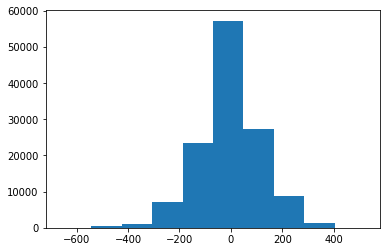

In [884]:
plt.hist(X_train.xsym)
plt.show()

#### Creating Copies for Under/Oversampling Techniques

In [20]:
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler
import pickle

In [21]:
tl = TomekLinks(ratio='majority')
cc = ClusterCentroids(ratio='majority')
rus = RandomUnderSampler('majority')

RAW:

In [23]:
# non-normalized: tomek links, cluster centroids, tomek links+RUS
X_train_tl, y_train_tl = tl.fit_sample(X_train, y_train)
X_train_cc, y_train_cc = cc.fit_sample(X_train, y_train)
X_train_tlrus, y_train_tlrus = rus.fit_sample(X_train, y_train) 

pca_X_train_plus5_tl, y_train_plus5_tl = tl.fit_sample(pca_X_train_plus5_std, 
                                                   y_train_plus5)
pca_X_train_plus5_cc, y_train_plus5_cc = cc.fit_sample(pca_X_train_plus5_std, 
                                                   y_train_plus5)
pca_X_train_plus5_tlrus, y_train_plus5_tlrus = rus.fit_sample(pca_X_train_plus5_std,
                                                          y_train_plus5) 

pca_X_train_plus30_2_tl, y_train_plus30_2_tl = tl.fit_sample(pca_X_train_plus30_2_std, 
                                                   y_train_plus30_2)
pca_X_train_plus30_2_cc, y_train_plus30_2_cc = cc.fit_sample(pca_X_train_plus30_2_std, 
                                                   y_train_plus30_2)
pca_X_train_plus30_2_tlrus, y_train_plus30_2_tlrus = rus.fit_sample(pca_X_train_plus30_2_std,
                                                          y_train_plus30_2) 

In [24]:
# with open('X_train_tl.pickle', 'wb') as handle:
#     pickle.dump(X_train_tl, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('X_train_cc.pickle', 'wb') as handle:
#     pickle.dump(X_train_cc, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('X_train_tlrus.pickle', 'wb') as handle:
#     pickle.dump(X_train_tlrus, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('y_train_tl.pickle', 'wb') as handle:
#     pickle.dump(y_train_tl, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('y_train_cc.pickle', 'wb') as handle:
#     pickle.dump(y_train_cc, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('y_train_tlrus.pickle', 'wb') as handle:
#     pickle.dump(y_train_tlrus, handle, protocol=pickle.HIGHEST_PROTOCOL)

Normalized

In [769]:
# # normalized: tomek links, cluster centroids, tomek links + RUS
# X_train_std_tl, y_train_std_tl = tl.fit_sample(X_train_std, y_train)
# X_train_std_cc, y_train_std_cc = cc.fit_sample(X_train_std, y_train)
# X_train_std_tlrus, y_train_std_tlrus = rus.fit_sample(X_train_std, y_train)

In [782]:
# with open('X_train_std_tl.pickle', 'wb') as handle:
#     pickle.dump(X_train_std_tl, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('X_train_std_cc.pickle', 'wb') as handle:
#     pickle.dump(X_train_std_cc, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('X_train_std_std_tlrus.pickle', 'wb') as handle:
#     pickle.dump(X_train_std_tlrus, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('y_train_std_tl.pickle', 'wb') as handle:
#     pickle.dump(y_train_std_tl, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('y_train_std_cc.pickle', 'wb') as handle:
#     pickle.dump(y_train_std_cc, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('y_train_std_tlrus.pickle', 'wb') as handle:
#     pickle.dump(y_train_std_tlrus, handle, protocol=pickle.HIGHEST_PROTOCOL)

PCA (SECOND) after doing preprocessing to balance data a bit. Use the y_train_std_tl, y_train_std_cc, and y_train_std_tlrus with this

In [778]:
# pca = PCA(n_components=10)
# pca.fit(X_train_std_tl)
# X_train_std_tl_pca = pca.transform(X_train_std_tl)
# X_test_std_tl_pca = pca.transform(X_test_std)

# pca = PCA(n_components=10)
# pca.fit(X_train_std_cc)
# X_train_std_cc_pca = pca.transform(X_train_std_cc)
# X_test_std_cc_pca = pca.transform(X_test_std)

# pca = PCA(n_components=10)
# pca.fit(X_train_std_tlrus)
# X_train_std_tlrus_pca = pca.transform(X_train_std_tlrus)
# X_test_std_tlrus_pca = pca.transform(X_test_std)

In [780]:
# with open('X_train_std_tl_pca.pickle', 'wb') as handle:
#     pickle.dump(X_train_std_tl_pca, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('X_train_std_cc_pca.pickle', 'wb') as handle:
#     pickle.dump(X_train_std_cc_pca, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('X_train_std_std_tlrus_pca.pickle', 'wb') as handle:
#     pickle.dump(X_train_std_tlrus, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('y_train_std_tl_pca.pickle', 'wb') as handle:
#     pickle.dump(y_train_std_tl, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('y_train_std_cc_pca.pickle', 'wb') as handle:
#     pickle.dump(y_train_std_cc, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('y_train_std_tlrus_pca.pickle', 'wb') as handle:
#     pickle.dump(y_train_std_tlrus, handle, protocol=pickle.HIGHEST_PROTOCOL)

PCA (FIRST), then doing tomek links, cluster centroids, and random undersampling. Use "pca_X_test" with these for X_test

In [967]:
# # pca: tomek links, clustr centroids, tomek links + RUS
# pca_X_train_std_tl, pca_y_train_std_tl = tl.fit_sample(pca_X_train_std, y_train)
# pca_X_train_std_cc, pca_y_train_std_cc = cc.fit_sample(pca_X_train_std, y_train)
# pca_X_train_std_tlrus, pca_y_train_std_tlrus = rus.fit_sample(pca_X_train_std, y_train)

In [968]:
# with open('pca_X_train_std_tl.pickle', 'wb') as handle:
#     pickle.dump(pca_X_train_std_tl, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('pca_X_train_std_cc.pickle', 'wb') as handle:
#     pickle.dump(pca_X_train_std_cc, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('pca_X_train_std_tlrus.pickle', 'wb') as handle:
#     pickle.dump(pca_X_train_std_tlrus, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('pca_y_train_std_tl.pickle', 'wb') as handle:
#     pickle.dump(pca_y_train_std_tl, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('pca_y_train_std_cc.pickle', 'wb') as handle:
#     pickle.dump(pca_y_train_std_cc, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('pca_y_train_std_tlrus.pickle', 'wb') as handle:
#     pickle.dump(pca_y_train_std_tlrus, handle, protocol=pickle.HIGHEST_PROTOCOL)

#### Rotation Forest Testing

In [26]:
clf = RotationForestClassifier(n_estimators=3, n_features_per_subset=3,
                              random_state=0)

In [47]:
clf.fit(pca_X_train_plus5_std, y_train_plus5)

RotationForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
             max_depth=None, max_features=1.0, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=3,
             n_features_per_subset=3, n_jobs=1, oob_score=False,
             random_state=0, rotation_algo='pca', verbose=0,
             warm_start=False)

In [48]:
rot_y_pred = clf.predict(pca_X_test_plus5_std)

In [49]:
print "Overall accuracy score: {0:2f}".format(balanced_accuracy_score(y_test_plus5, rot_y_pred))

Overall accuracy score: 0.434097


In [32]:
confusion_matrix(y_test_plus5, rot_y_pred)

array([[17266,  9445, 13181,   439],
       [    0,    63,    62,     0],
       [    0,    64,   263,     0],
       [  456,   642,   377,     0]], dtype=int64)

In [71]:
y_test_plus5.value_counts()

Forward-NTD      40331
Stop              1475
ReverseShort       327
Forward-Sharp      125
Name: annotation_5, dtype: int64

In [73]:
labels = np.unique(y_test_plus5)
for i in labels:
    print i+" accuracy score: {0:2f}%".format(100*float(sum(rot_y_pred[np.where(y_test_plus5==i)[0]] == y_test.iloc[np.where(y_test_plus5==i)[0]]))/len(np.where(y_test_plus5==i)[0]))

Forward-NTD accuracy score: 43.214897%
Forward-Sharp accuracy score: 50.400000%
ReverseShort accuracy score: 79.816514%
Stop accuracy score: 0.000000%


#### Random Forest Testing

In [1082]:
rf_clf = RandomForestClassifier(n_estimators=30, criterion='gini', min_samples_leaf=5, random_state=0)

In [1083]:
rf_clf.fit(X_train_cc, y_train_cc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [1084]:
rf_y_pred = rf_clf.predict(X_test)

In [1085]:
print "Overall global F1 score: {0:2f}".format(f1_score(y_test, rf_y_pred, average='macro'))

Overall global F1 score: 0.199562


In [1086]:
confusion_matrix(y_test, rf_y_pred)

array([[11607,    68,  5270, 23391],
       [    1,    34,    10,    80],
       [   19,     4,    51,   253],
       [   84,    50,   118,  1223]], dtype=int64)

In [1087]:
y_test.value_counts()

Forward-NTD      40336
Stop              1475
ReverseShort       327
Forward-Sharp      125
Name: annotation, dtype: int64

In [1088]:
labels = np.unique(y_test)
for i in labels:
    print i+" accuracy score: {0:2f}%".format(100*float(sum(rf_y_pred[np.where(y_test==i)[0]] == y_test.iloc[np.where(y_test==i)[0]]))/len(np.where(y_test==i)[0]))

Forward-NTD accuracy score: 28.775783%
Forward-Sharp accuracy score: 27.200000%
ReverseShort accuracy score: 15.596330%
Stop accuracy score: 82.915254%


###### Comparing performance on two parameters

In [1034]:
def gridRFgen(min_leaf, n_trees, xtrain, xtest, ytrain, ytest):
    z = []
    for i in range(0, len(n_trees)):
        partial = []
        for j in range(0, len(min_leaf)):
            clf = RandomForestClassifier(n_estimators=n_trees[i], min_samples_leaf=min_leaf[j],
                                         random_state=0)
            clf.fit(xtrain, ytrain)
            y_pred = clf.predict(xtest)
            partial.append(f1_score(ytest, y_pred, average='macro'))
        z.append(partial)
    return z

In [1069]:
x_gen = np.arange(5, 100, 5)
y_gen = np.arange(5,100, 5)
xi, yi = np.meshgrid(x_gen, y_gen)

In [1070]:
z_gen = gridRFgen(x_gen, y_gen, X_train_cc, X_test, y_train_cc, y_test)

In [1075]:
np.array(z_gen).shape

(19L, 19L)

In [1081]:
xi.shape

(19L, 19L)

In [1073]:
pd.DataFrame(z_gen).to_csv("z_gen.csv")
pd.DataFrame(xi).to_csv("xi.csv")
pd.DataFrame(yi).to_csv("yi.csv")


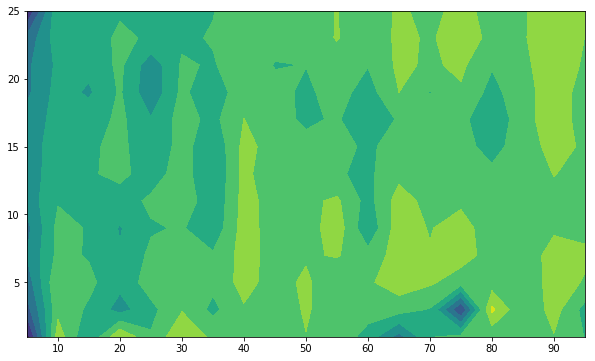

In [1067]:
# fig, ax = subplots()
figure(figsize=(10,6))
plt.contourf(xi, yi, z_gen)
#plt.colorbar()
plt.show()

#### AdaBoost Testing

In [90]:
ada_clf = AdaBoostClassifier(n_estimators=5, 
                             base_estimator=DecisionTreeClassifier(max_depth=2),
                            random_state=0)

In [91]:
ada_clf.fit(pca_X_train_plus5_std, y_train_plus5)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=5, random_state=0)

In [92]:
ada_y_pred = ada_clf.predict(pca_X_test_std)

In [93]:
print "Overall accuracy score: {0:2f}".format(accuracy_score(y_test, ada_y_pred))

Overall accuracy score: 0.954405


In [94]:
confusion_matrix(y_test, ada_y_pred)

array([[40336,     0,     0,     0],
       [  125,     0,     0,     0],
       [  327,     0,     0,     0],
       [ 1475,     0,     0,     0]], dtype=int64)

In [95]:
y_test.value_counts()

Forward-NTD      40336
Stop              1475
ReverseShort       327
Forward-Sharp      125
Name: annotation, dtype: int64

In [1289]:
labels = np.unique(y_3)
for i in labels:
    print i+" accuracy score: {0:2f}%".format(100*float(sum(ada_y_pred[np.where(y_test==i)[0]] == y_test.iloc[np.where(y_test==i)[0]]))/len(np.where(y_test==i)[0]))

Forward-NTD accuracy score: 11.274726%
Forward-Sharp accuracy score: 10.638298%
ReverseShort accuracy score: 44.038929%
Stop accuracy score: 90.404345%


#### Custom: PCA+Bagging+Boosting+Full Trees

In [1089]:
myRotBoost = Pipeline([
    ('Bagging', BaggingClassifier(n_estimators=5,
                                  base_estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=None,
                                                                                                         criterion='entropy'),
                                                                   n_estimators=3,
                                                                   learning_rate=1,
                                                                   random_state=0),
                                 random_state=0))
])

In [1090]:
myRotBoost.fit(pca_X_train_plus5_std, y_train_plus5)

Pipeline(memory=None,
     steps=[('Bagging', BaggingClassifier(base_estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_..._estimators=5, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False))])

In [1091]:
myRotBoost_y_pred = myRotBoost.predict(pca_X_test_plus5_std)

In [1100]:
print "Overall accuracy score: {0:2f}".format(f1_score(y_test_plus5, myRotBoost_y_pred, average='macro'))

Overall accuracy score: 0.143972


In [1101]:
confusion_matrix(y_test_plus5, myRotBoost_y_pred)

array([[14685,  8279, 17367,     0],
       [    0,    62,    63,     0],
       [    0,    62,   265,     0],
       [  282,   582,   609,     2]], dtype=int64)

In [1104]:
y_test_plus5.value_counts()

Forward-NTD      40331
Stop              1475
ReverseShort       327
Forward-Sharp      125
Name: annotation_5, dtype: int64

In [1103]:
labels = np.unique(y_test)
for i in labels:
    print i+" accuracy score: {0:2f}%".format(100*float(sum(myRotBoost_y_pred[np.where(y_test_plus5==i)[0]] == y_test_plus5.iloc[np.where(y_test_plus5==i)[0]]))/len(np.where(y_test==i)[0]))

Forward-NTD accuracy score: 36.406684%
Forward-Sharp accuracy score: 49.600000%
ReverseShort accuracy score: 81.039755%
Stop accuracy score: 0.135593%


#### Naive Bayes Testing

In [483]:
nb_clf = GaussianNB()

In [508]:
nb_clf.fit(pca_X_train_plus30_2_std, y_train_plus30_2)

GaussianNB(priors=None, var_smoothing=1e-09)

In [509]:
nb_y_pred = nb_clf.predict(pca_X_test_plus30_2_std)

In [510]:
print "Overall balanced accuracy score: {0:2f}".format(balanced_accuracy_score(y_test_plus30_2, nb_y_pred))

Overall balanced accuracy score: 0.250000


In [511]:
confusion_matrix(y_test_plus30_2, nb_y_pred)

array([[40277,     0,     0,     0],
       [  125,     0,     0,     0],
       [  327,     0,     0,     0],
       [ 1475,     0,     0,     0]], dtype=int64)

In [488]:
y_test.value_counts()

Forward-NTD      40336
Stop              1475
ReverseShort       327
Forward-Sharp      125
Name: annotation, dtype: int64

In [489]:
labels = np.unique(y_test_plus5)
for i in labels:
    print i+" accuracy score: {0:2f}%".format(100*float(sum(nb_y_pred[np.where(y_test_plus5==i)[0]] == y_test_plus5.iloc[np.where(y_test_plus5==i)[0]]))/len(np.where(y_test_plus5==i)[0]))

Forward-NTD accuracy score: 99.980164%
Forward-Sharp accuracy score: 0.000000%
ReverseShort accuracy score: 0.000000%
Stop accuracy score: 0.000000%


#### Decison Tree Testing

In [1027]:
tree_clf = DecisionTreeClassifier()

In [1028]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [1030]:
tree_y_pred = tree_clf.predict(X_test)

In [1031]:
print "Overall accuracy score: {0:2f}".format(accuracy_score(y_test, tree_y_pred))

Overall accuracy score: 0.852036


In [1032]:
confusion_matrix(y_test, tree_y_pred)

array([[30300,  3005,    72,   249,   397],
       [   34,     0,     0,    18,    89],
       [    4,     2,     0,    13,    62],
       [  152,     0,     0,   140,   119],
       [  672,    10,    85,   390,   500]], dtype=int64)

In [1033]:
y_test.value_counts()

Forward-NTD      34023
Stop              1657
ReverseShort       411
Forward-Sharp      141
ReverseLong         81
Name: annotation, dtype: int64

In [1035]:
labels = np.unique(y_3)
for i in labels:
    print i+" accuracy score: {0:2f}%".format(100*float(sum(tree_y_pred[np.where(y_test==i)[0]] == y_test.iloc[np.where(y_test==i)[0]]))/len(np.where(y_test==i)[0]))

Forward-NTD accuracy score: 89.057402%
Forward-Sharp accuracy score: 0.000000%
ReverseShort accuracy score: 34.063260%
Stop accuracy score: 30.175015%


#### KNN  Testing

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [1327]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [1467]:
knn_clf.fit(pca_X_train_std_tl, pca_y_train_std_tl)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [1470]:
knn_y_pred = knn_clf.predict(pca_X_test_std)

In [1495]:
print "Overall accuracy score: {0:2f}".format(accuracy_score(y_test, knn_y_pred))
print "Overall balanced accuracy score: {0:2f}".format(balanced_accuracy_score(y_test, knn_y_pred))
print "Overall F1 score: {0:2f}".format(f1_score(y_test, knn_y_pred, average='macro'))
print "Overall precision score: {0:2f}".format(precision_score(y_test, knn_y_pred,average='macro'))
print "Overall recall score: {0:2f}".format(recall_score(y_test, knn_y_pred,average='macro'))

Overall accuracy score: 0.936634
Overall balanced accuracy score: 0.199935
Overall F1 score: 0.193456
Overall precision score: 0.187384
Overall recall score: 0.199935


In [1488]:
confusion_matrix(y_test, knn_y_pred)

array([[34012,     6,     0,     2,     3],
       [  141,     0,     0,     0,     0],
       [   81,     0,     0,     0,     0],
       [  411,     0,     0,     0,     0],
       [ 1657,     0,     0,     0,     0]], dtype=int64)

In [1489]:
y_test.value_counts()

Forward-NTD      34023
Stop              1657
ReverseShort       411
Forward-Sharp      141
ReverseLong         81
Name: annotation, dtype: int64

In [1490]:
labels = np.unique(y_3)
for i in labels:
    print i+" accuracy score: {0:2f}%".format(100*float(sum(knn_y_pred[np.where(y_test==i)[0]] == y_test.iloc[np.where(y_test==i)[0]]))/len(np.where(y_test==i)[0]))

Forward-NTD accuracy score: 99.967669%
Forward-Sharp accuracy score: 0.000000%
ReverseShort accuracy score: 0.000000%
Stop accuracy score: 0.000000%


## Individual Model Testing Pipeline

In [420]:
training_sets = defaultdict(list)
training_sets={'raw':[X_train, 
                      y_train, 
                      X_test, 
                      y_test],
               'raw->tomek':[X_train_tl, 
                             y_train_tl,
                             X_test, 
                             y_test],
               'raw->cc':[X_train_cc, 
                          y_train_cc,
                          X_test, 
                          y_test],
               'raw->tomek->rus':[X_train_tlrus, 
                                  y_train_tlrus, 
                                  X_test,
                                  y_test],
               'pca5+':[pca_X_train_plus5_std, 
                        y_train_plus5, 
                        pca_X_test_plus5_std, 
                        y_test_plus5],
               'pca5+->tomek':[pca_X_train_plus5_tl, 
                               y_train_plus5_tl,
                               pca_X_test_plus5_std, 
                               y_test_plus5],
               'pca5+->cc':[pca_X_train_plus5_cc, 
                            y_train_plus5_cc, 
                            pca_X_test_plus5_std, 
                            y_test_plus5],
               'pca5+->tomek->rus':[pca_X_train_plus5_tlrus, 
                                    y_train_plus5_tlrus, 
                                    pca_X_test_plus5_std,
                                    y_test_plus5],
               'pca30+':[pca_X_train_plus30_2_std, 
                         y_train_plus30_2,
                         pca_X_test_plus30_2_std, 
                         y_test_plus30_2],
               'pca30+->tomek':[pca_X_train_plus30_2_tl, 
                                y_train_plus30_2_tl,
                                pca_X_test_plus30_2_std, 
                                y_test_plus30_2],
               'pca30+->cc':[pca_X_train_plus30_2_cc, 
                             y_train_plus30_2_cc, 
                             pca_X_test_plus30_2_std, 
                             y_test_plus30_2],
               'pca30+->tomek->rus':[pca_X_train_plus30_2_tlrus,
                                     y_train_plus30_2_tlrus, 
                                     pca_X_test_plus30_2_std,
                                     y_test_plus30_2]
}

with open('training_sets_master.pickle', 'wb') as handle:
    pickle.dump(training_sets, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [421]:
# setting up a dict for the y_pred results to be stored in for meta-learner
y_gen_predicted= defaultdict(list)
y_gen_predicted = {'DT': [],
                   'RF': [],
                   'RotF': [],
                   'Ada': [],
                   'Bag+Boost':[],
                   'NB': [],
                   'KNN': []
                  }

y_res_predicted= defaultdict(list)
y_res_predicted = {'DT': [],
                   'RF': [],
                   'RotF': [],
                   'Ada': [],
                   'Bag+Boost':[],
                   'NB': [],
                   'KNN': []
                  }

# setting up the results column which resub/gen performance will be recorded in
res_cols = ['Model', 'Gen/Res','Training Set', 'Accuracy', 'Balanced Accuracy', 
            'F1', 'Precision', 'Recall']
simple_learners_res = pd.DataFrame(columns=res_cols)

#### Simple First Approach First

In [422]:
models = {'DT': DecisionTreeClassifier(min_samples_leaf=10), 
          'RF':RandomForestClassifier(n_estimators=3, min_samples_leaf=10, random_state=0),
          'RotF':RotationForestClassifier(n_estimators=3, min_samples_leaf=10, random_state=0),
          'Ada':AdaBoostClassifier(n_estimators=5, 
                             base_estimator=DecisionTreeClassifier(max_depth=2),
                             random_state=0),
          'Bag+Boost':myRotBoost,
          'NB':GaussianNB(),
         }

In [423]:
for model_key in models.keys():
    clf = models[model_key]
    print 'Starting '+model_key,'...'
    
    for training_set_key in training_sets.keys():
        print 'Starting '+training_set_key
        
        X_trn, y_trn, X_tst, y_tst = training_sets[training_set_key]
        clf.fit(X_trn, y_trn)
        # resubstitution
        resub_ypred = clf.predict(X_trn)
        resub_load = pd.DataFrame(data=np.array([[model_key,'res',
                                                 training_set_key,
                                                 accuracy_score(y_trn,resub_ypred),
                                                 balanced_accuracy_score(y_trn,resub_ypred),
                                                 f1_score(y_trn, resub_ypred, average='macro'),
                                                 precision_score(y_trn, resub_ypred, average='macro'),
                                                 recall_score(y_trn, resub_ypred, average='macro')]]),
                                 columns=res_cols)
        simple_learners_res = pd.concat([simple_learners_res, 
                                       resub_load], ignore_index=True)
        y_res_predicted[model_key].append(training_set_key)
        y_res_predicted[model_key].append(resub_ypred)
        
        # generalization
        gen_ypred = clf.predict(X_tst)
        gen_load = pd.DataFrame(data=np.array([[model_key,'gen',
                                                 training_set_key,
                                                 accuracy_score(y_tst,gen_ypred),
                                                 balanced_accuracy_score(y_tst,gen_ypred),
                                                 f1_score(y_tst, gen_ypred, average='macro'),
                                                 precision_score(y_tst, gen_ypred, average='macro'),
                                                 recall_score(y_tst, gen_ypred, average='macro')]]),
                               columns=res_cols)
        simple_learners_res = pd.concat([simple_learners_res, 
                                       gen_load], ignore_index=True)
        y_gen_predicted[model_key].append(training_set_key)
        y_gen_predicted[model_key].append(gen_ypred)
        
    print 'Finishing'+model_key,'...'

Starting NB ...
Starting pca5+->tomek
Starting pca30+
Starting raw
Starting pca30+->tomek->rus
Starting raw->tomek->rus
Starting pca5+->cc
Starting pca30+->cc
Starting raw->cc
Starting pca5+->tomek->rus
Starting pca30+->tomek
Starting raw->tomek
Starting pca5+
FinishingNB ...
Starting Ada ...
Starting pca5+->tomek
Starting pca30+
Starting raw
Starting pca30+->tomek->rus
Starting raw->tomek->rus
Starting pca5+->cc
Starting pca30+->cc
Starting raw->cc
Starting pca5+->tomek->rus
Starting pca30+->tomek
Starting raw->tomek
Starting pca5+
FinishingAda ...
Starting RF ...
Starting pca5+->tomek
Starting pca30+
Starting raw
Starting pca30+->tomek->rus
Starting raw->tomek->rus
Starting pca5+->cc
Starting pca30+->cc
Starting raw->cc
Starting pca5+->tomek->rus
Starting pca30+->tomek
Starting raw->tomek
Starting pca5+
FinishingRF ...
Starting Bag+Boost ...
Starting pca5+->tomek
Starting pca30+
Starting raw
Starting pca30+->tomek->rus
Starting raw->tomek->rus
Starting pca5+->cc
Starting pca30+->cc
S

In [491]:
simple_learners_res.to_csv('simple_learners_res.csv')

In [70]:
with open('simple_learners_res.pickle', 'wb') as handle:
    pickle.dump(simple_learners_res, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('y_gen_predicted.pickle', 'wb') as handle:
    pickle.dump(y_gen_predicted, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('y_res_predicted.pickle', 'wb') as handle:
    pickle.dump(y_res_predicted, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [72]:
max(simple_learners_res[simple_learners_res['Gen/Res']=='gen']['Balanced Accuracy'])

'0.43625098779892046'

#### Less Simple Approach (medium)

In [1557]:
myRotBoost2 = Pipeline([
    ('Bagging', BaggingClassifier(n_estimators=10,
                                  base_estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=None,
                                                                                                         criterion='entropy'),
                                                                   n_estimators=6,
                                                                   learning_rate=1,
                                                                   random_state=0),
                                 random_state=0))
])

In [1615]:
# setting up a dict for the y_pred results to be stored in for meta-learner
y_gen_predicted_med= defaultdict(list)
y_gen_predicted_med = {'DT': [],
                   'RF': [],
                   'RotF': [],
                   'Ada': [],
                   'Bag+Boost':[],
                   'NB': [],
                   'KNN': []
                  }

y_res_predicted_med= defaultdict(list)
y_res_predicted_med = {'DT': [],
                   'RF': [],
                   'RotF': [],
                   'Ada': [],
                   'Bag+Boost':[],
                   'NB': [],
                   'KNN': []
                  }

# setting up the results column which resub/gen performance will be recorded in
res_cols = ['Model', 'Gen/Res','Training Set', 'Accuracy', 'Balanced Accuracy', 
            'F1', 'Precision', 'Recall']
med_learners_res = pd.DataFrame(columns=res_cols)

In [1617]:
models_med = {'DT': DecisionTreeClassifier(), 
          'RF':RandomForestClassifier(n_estimators=10, random_state=0),
          'RotF':RotationForestClassifier(n_estimators=6, random_state=0),
          'Ada':AdaBoostClassifier(n_estimators=10, 
                             base_estimator=DecisionTreeClassifier(max_depth=2),
                             random_state=0),
          'Bag+Boost':myRotBoost,
          'NB':GaussianNB(),
          'KNN':KNeighborsClassifier(n_neighbors=5)
         }

In [1618]:
for model_key in models_med.keys():
    clf = models_med[model_key]
    print 'Starting '+model_key,'...'
    
    for training_set_key in training_sets.keys():
        print '\tStarting '+training_set_key
        
        X_trn, y_trn, X_tst, y_tst = training_sets[training_set_key]
        clf.fit(X_trn, y_trn)
        # resubstitution
        resub_ypred = clf.predict(X_trn)
        resub_load = pd.DataFrame(data=np.array([[model_key,'res',
                                                 training_set_key,
                                                 accuracy_score(y_trn,resub_ypred),
                                                 balanced_accuracy_score(y_trn,resub_ypred),
                                                 f1_score(y_trn, resub_ypred, average='macro'),
                                                 precision_score(y_trn, resub_ypred, average='macro'),
                                                 recall_score(y_trn, resub_ypred, average='macro')]]),
                                 columns=res_cols)
        med_learners_res = pd.concat([med_learners_res, 
                                       resub_load], ignore_index=True)
        y_res_predicted_med[model_key].append(training_set_key)
        y_res_predicted_med[model_key].append(resub_ypred)
        
        # generalization
        gen_ypred = clf.predict(X_tst)
        gen_load = pd.DataFrame(data=np.array([[model_key,'gen',
                                                 training_set_key,
                                                 accuracy_score(y_tst,gen_ypred),
                                                 balanced_accuracy_score(y_tst,gen_ypred),
                                                 f1_score(y_tst, gen_ypred, average='macro'),
                                                 precision_score(y_tst, gen_ypred, average='macro'),
                                                 recall_score(y_tst, gen_ypred, average='macro')]]),
                               columns=res_cols)
        med_learners_res = pd.concat([med_learners_res, 
                                       gen_load], ignore_index=True)
        y_gen_predicted_med[model_key].append(training_set_key)
        y_gen_predicted_med[model_key].append(gen_ypred)
        
    print 'Finishing'+model_key,'...'

Starting KNN ...
	Starting pca->tomek
	Starting raw
	Starting raw->tomek->cc
	Starting cc->pca
	Starting pca->tomek->cc
	Starting raw->cc
	Starting raw->tomek
	Starting pca->cc
	Starting tomek->cc->pca
	Starting pca
	Starting tomek->pca
FinishingKNN ...
Starting NB ...
	Starting pca->tomek
	Starting raw
	Starting raw->tomek->cc
	Starting cc->pca
	Starting pca->tomek->cc
	Starting raw->cc
	Starting raw->tomek
	Starting pca->cc
	Starting tomek->cc->pca
	Starting pca
	Starting tomek->pca
FinishingNB ...
Starting Ada ...
	Starting pca->tomek
	Starting raw
	Starting raw->tomek->cc
	Starting cc->pca
	Starting pca->tomek->cc
	Starting raw->cc
	Starting raw->tomek
	Starting pca->cc
	Starting tomek->cc->pca
	Starting pca
	Starting tomek->pca
FinishingAda ...
Starting RF ...
	Starting pca->tomek
	Starting raw
	Starting raw->tomek->cc
	Starting cc->pca
	Starting pca->tomek->cc
	Starting raw->cc
	Starting raw->tomek
	Starting pca->cc
	Starting tomek->cc->pca
	Starting pca
	Starting tomek->pca
Fini

In [1620]:
# with open('med_learners_res.pickle', 'wb') as handle:
#     pickle.dump(med_learners_res, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('y_gen_predicted_med.pickle', 'wb') as handle:
#     pickle.dump(y_gen_predicted_med, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('y_res_predicted_med.pickle', 'wb') as handle:
#     pickle.dump(y_res_predicted_med, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Meta Dataset Construction

###### Setting up meta learning datasets

In [492]:
# meta training sets
raw_meta_train = []
raw_tl_meta_train = []
raw_cc_meta_train = []
raw_tlrus_meta_train = []
pca_5_meta_train = []
pca_5_tl_meta_train = []
pca_5_cc_meta_train = []
pca_5_tlrus_meta_train = []
pca_30_meta_train = []
pca_30_tl_meta_train = []
pca_30_cc_meta_train = []
pca_30_tlrus_meta_train = []

# meta testing sets
raw_meta_test = []
raw_tl_meta_test = []
raw_cc_meta_test = []
raw_tlrus_meta_test = []
pca_5_meta_test = []
pca_5_tl_meta_test = []
pca_5_cc_meta_test = []
pca_5_tlrus_meta_test = []
pca_30_meta_test = []
pca_30_tl_meta_test = []
pca_30_cc_meta_test = []
pca_30_tlrus_meta_test = []

In [493]:
train_label_map = {'raw':'raw_meta_train', 
                'raw->tomek':'raw_tl_meta_train', 
                'raw->cc':'raw_cc_meta_train', 
                'raw->tomek->rus':'raw_tlrus_meta_train',
                'pca5+':'pca_5_meta_train',
                'pca5+->tomek':'pca_5_tl_meta_train',
                'pca5+->cc':'pca_5_cc_meta_train',
                'pca5+->tomek->rus':'pca_5_tlrus_meta_train', 
                'pca30+':'pca_30_meta_train',
                'pca30+->tomek':'pca_30_tl_meta_train',
                'pca30+->cc':'pca_30_cc_meta_train',
                'pca30+->tomek->rus':'pca_30_tlrus_meta_train'}

test_label_map = {'raw':'raw_meta_test', 
                'raw->tomek':'raw_tl_meta_test', 
                'raw->cc':'raw_cc_meta_test', 
                'raw->tomek->rus':'raw_tlrus_meta_test',
                'pca5+':'pca_5_meta_test',
                'pca5+->tomek':'pca_5_tl_meta_test',
                'pca5+->cc':'pca_5_cc_meta_test',
                'pca5+->tomek->rus':'pca_5_tlrus_meta_test', 
                'pca30+': 'pca_30_meta_test',
                'pca30+->tomek':'pca_30_tl_meta_test',
                'pca30+->cc':'pca_30_cc_meta_test',
                'pca30+->tomek->rus':'pca_30_tlrus_meta_test'}

# combining the resubstitution results
for k, v in y_res_predicted.iteritems():
    results = v
    for i in range(0, len(results)-1):
        if type(results[i]) == str:
            eval(train_label_map[results[i]]).append(np.append(k+'_'+results[i],
                                                               results[i+1]))

# combining the generalization results
for k, v in y_gen_predicted.iteritems():
    results = v
    for i in range(0, len(results)-1):
        if type(results[i]) == str:
            eval(test_label_map[results[i]]).append(np.append(k+'_'+results[i],
                                                               results[i+1]))           

In [494]:
# meta training sets
raw_meta_train = pd.DataFrame(np.array(raw_meta_train).T[1:],
                             columns=np.array(raw_meta_train).T[0].reshape(1,6)[0])
raw_tl_meta_train = pd.DataFrame(np.array(raw_tl_meta_train).T[1:],
                             columns=np.array(raw_tl_meta_train).T[0].reshape(1,6)[0])
raw_cc_meta_train = pd.DataFrame(np.array(raw_cc_meta_train).T[1:],
                             columns=np.array(raw_cc_meta_train).T[0].reshape(1,6)[0])
raw_tlrus_meta_train = pd.DataFrame(np.array(raw_tlrus_meta_train).T[1:],
                             columns=np.array(raw_tlrus_meta_train).T[0].reshape(1,6)[0])
pca_5_meta_train = pd.DataFrame(np.array(pca_5_meta_train).T[1:],
                             columns=np.array(pca_5_meta_train).T[0].reshape(1,6)[0])
pca_5_tl_meta_train = pd.DataFrame(np.array(pca_5_tl_meta_train).T[1:],
                             columns=np.array(pca_5_tl_meta_train).T[0].reshape(1,6)[0])
pca_5_cc_meta_train = pd.DataFrame(np.array(pca_5_cc_meta_train).T[1:],
                             columns=np.array(pca_5_cc_meta_train).T[0].reshape(1,6)[0])
pca_5_tlrus_meta_train = pd.DataFrame(np.array(pca_5_tlrus_meta_train).T[1:],
                             columns=np.array(pca_5_tlrus_meta_train).T[0].reshape(1,6)[0])
pca_30_meta_train = pd.DataFrame(np.array(pca_30_meta_train).T[1:],
                             columns=np.array(pca_30_meta_train).T[0].reshape(1,6)[0])
pca_30_tl_meta_train = pd.DataFrame(np.array(pca_30_tl_meta_train).T[1:],
                             columns=np.array(pca_30_tl_meta_train).T[0].reshape(1,6)[0])
pca_30_cc_meta_train = pd.DataFrame(np.array(pca_30_cc_meta_train).T[1:],
                             columns=np.array(pca_30_cc_meta_train).T[0].reshape(1,6)[0])
pca_30_tlrus_meta_train = pd.DataFrame(np.array(pca_30_tlrus_meta_train).T[1:],
                             columns=np.array(pca_30_tlrus_meta_train).T[0].reshape(1,6)[0])

# meta testing sets
raw_meta_test = pd.DataFrame(np.array(raw_meta_test).T[1:],
                             columns=np.array(raw_meta_test).T[0].reshape(1,6)[0])
raw_tl_meta_test = pd.DataFrame(np.array(raw_tl_meta_test).T[1:],
                             columns=np.array(raw_tl_meta_test).T[0].reshape(1,6)[0])
raw_cc_meta_test = pd.DataFrame(np.array(raw_cc_meta_test).T[1:],
                             columns=np.array(raw_cc_meta_test).T[0].reshape(1,6)[0])
raw_tlrus_meta_test = pd.DataFrame(np.array(raw_tlrus_meta_test).T[1:],
                             columns=np.array(raw_tlrus_meta_test).T[0].reshape(1,6)[0])
pca_5_meta_test = pd.DataFrame(np.array(pca_5_meta_test).T[1:],
                             columns=np.array(pca_5_meta_test).T[0].reshape(1,6)[0])
pca_5_tl_meta_test = pd.DataFrame(np.array(pca_5_tl_meta_test).T[1:],
                             columns=np.array(pca_5_tl_meta_test).T[0].reshape(1,6)[0])
pca_5_cc_meta_test = pd.DataFrame(np.array(pca_5_cc_meta_test).T[1:],
                             columns=np.array(pca_5_cc_meta_test).T[0].reshape(1,6)[0])
pca_5_tlrus_meta_test = pd.DataFrame(np.array(pca_5_tlrus_meta_test).T[1:],
                             columns=np.array(pca_5_tlrus_meta_test).T[0].reshape(1,6)[0])
pca_30_meta_test = pd.DataFrame(np.array(pca_30_meta_test).T[1:],
                             columns=np.array(pca_30_meta_test).T[0].reshape(1,6)[0])
pca_30_tl_meta_test = pd.DataFrame(np.array(pca_30_tl_meta_test).T[1:],
                             columns=np.array(pca_30_tl_meta_test).T[0].reshape(1,6)[0])
pca_30_cc_meta_test = pd.DataFrame(np.array(pca_30_cc_meta_test).T[1:],
                             columns=np.array(pca_30_cc_meta_test).T[0].reshape(1,6)[0])
pca_30_tlrus_meta_test = pd.DataFrame(np.array(pca_30_tlrus_meta_test).T[1:],
                             columns=np.array(pca_30_tlrus_meta_test).T[0].reshape(1,6)[0])

In [1801]:
# with open('raw_meta_train.pickle', 'wb') as handle:
#     pickle.dump(raw_meta_train, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('raw_tl_meta_train.pickle', 'wb') as handle:
#     pickle.dump(raw_tl_meta_train, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('raw_cc_meta_train.pickle', 'wb') as handle:
#     pickle.dump(raw_cc_meta_train, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('raw_tlrus_meta_train.pickle', 'wb') as handle:
#     pickle.dump(raw_tlrus_meta_train, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('pca_meta_train.pickle', 'wb') as handle:
#     pickle.dump(pca_meta_train, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('pca_tl_meta_train.pickle', 'wb') as handle:
#     pickle.dump(pca_tl_meta_train, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('pca_cc_meta_train.pickle', 'wb') as handle:
#     pickle.dump(pca_cc_meta_train, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('pca_tlrus_meta_train.pickle', 'wb') as handle:
#     pickle.dump(pca_tlrus_meta_train, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open('tl_pca_meta_train.pickle', 'wb') as handle:
#     pickle.dump(tl_pca_meta_train, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('cc_pca_meta_train.pickle', 'wb') as handle:
#     pickle.dump(cc_pca_meta_train, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('tlrus_pca_meta_train.pickle', 'wb') as handle:
#     pickle.dump(tlrus_pca_meta_train, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [1802]:
# with open('raw_meta_test.pickle', 'wb') as handle:
#     pickle.dump(raw_meta_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('raw_tl_meta_test.pickle', 'wb') as handle:
#     pickle.dump(raw_tl_meta_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('raw_cc_meta_test.pickle', 'wb') as handle:
#     pickle.dump(raw_cc_meta_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('raw_tlrus_meta_test.pickle', 'wb') as handle:
#     pickle.dump(raw_tlrus_meta_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('pca_meta_test.pickle', 'wb') as handle:
#     pickle.dump(pca_meta_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('pca_tl_meta_test.pickle', 'wb') as handle:
#     pickle.dump(pca_tl_meta_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('pca_cc_meta_test.pickle', 'wb') as handle:
#     pickle.dump(pca_cc_meta_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('pca_tlrus_meta_test.pickle', 'wb') as handle:
#     pickle.dump(pca_tlrus_meta_test, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open('tl_pca_meta_test.pickle', 'wb') as handle:
#     pickle.dump(tl_pca_meta_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('cc_pca_meta_test.pickle', 'wb') as handle:
#     pickle.dump(cc_pca_meta_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('tlrus_pca_meta_test.pickle', 'wb') as handle:
#     pickle.dump(tlrus_pca_meta_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [495]:
meta_trainres_sets = [raw_meta_train, raw_tl_meta_train,
                      raw_cc_meta_train, raw_tlrus_meta_train,
                      pca_5_meta_train, pca_5_tl_meta_train,
                      pca_5_cc_meta_train, pca_5_tlrus_meta_train,
                      pca_30_meta_train, pca_30_tl_meta_train, 
                      pca_30_cc_meta_train, pca_30_tlrus_meta_train]

meta_trainres_y_sets = [y_train, y_train_tl, y_train_cc, y_train_tlrus, 
                       y_train_plus5, y_train_plus5_tl, y_train_plus5_cc,
                       y_train_plus5_tlrus, y_train_plus30_2, y_train_plus30_2_tl,
                       y_train_plus30_2_cc, y_train_plus30_2_tlrus]

meta_testres_sets = [raw_meta_test, raw_tl_meta_test,
                      raw_cc_meta_test, raw_tlrus_meta_test,
                      pca_5_meta_test, pca_5_tl_meta_test,
                      pca_5_cc_meta_test, pca_5_tlrus_meta_test,
                      pca_30_meta_test, pca_30_tl_meta_test, 
                      pca_30_cc_meta_test, pca_30_tlrus_meta_test]

### Meta Learners

In [496]:
from sklearn.ensemble import VotingClassifier

In [497]:
encode_map= {'Forward-NTD':0, 'Forward-Sharp':1, 'ReverseLong':2, 
            'ReverseShort':3, 'Stop':4}
decode_map= {0:'Forward-NTD', 1:'Forward-Sharp', 2:'ReverseLong', 
            3:'ReverseShort', 4:'Stop'}

In [498]:
def encode_df(df):
    df2 = df.copy()
    for i in df:
        encoded = [encode_map[j] for j in df[i]]
        df2[i] = encoded
    return df2        

In [499]:
def decode_df(df):
    df2 = df.copy()
    for i in df:
        decoded = [decode_map[j] for j in df[i]]
        df2[i] = decoded
    return df2    

In [500]:
meta_trainres_sets = [raw_meta_train, raw_tl_meta_train,
                      raw_cc_meta_train, raw_tlrus_meta_train,
                      pca_5_meta_train, pca_5_tl_meta_train,
                      pca_5_cc_meta_train, pca_5_tlrus_meta_train,
                      pca_30_meta_train, pca_30_tl_meta_train, 
                      pca_30_cc_meta_train, pca_30_tlrus_meta_train]

meta_trainres_y_sets = [y_train, y_train_tl, y_train_cc, y_train_tlrus, 
                       y_train_plus5, y_train_plus5_tl, y_train_plus5_cc,
                       y_train_plus5_tlrus, y_train_plus30_2, y_train_plus30_2_tl,
                       y_train_plus30_2_cc, y_train_plus30_2_tlrus]

meta_testres_sets = [raw_meta_test, raw_tl_meta_test,
                      raw_cc_meta_test, raw_tlrus_meta_test,
                      pca_5_meta_test, pca_5_tl_meta_test,
                      pca_5_cc_meta_test, pca_5_tlrus_meta_test,
                      pca_30_meta_test, pca_30_tl_meta_test, 
                      pca_30_cc_meta_test, pca_30_tlrus_meta_test]

In [501]:
meta_training_dict = defaultdict(list)
meta_training_dict={'raw':[raw_meta_train, y_train, raw_meta_test, y_test],
               'raw->tomek':[raw_tl_meta_train, y_train_tl, raw_tl_meta_test, y_test],
               'raw->cc':[raw_cc_meta_train, y_train_cc, raw_cc_meta_test, y_test],
               'raw->tomek->rus':[raw_tlrus_meta_train, y_train_tlrus, raw_tlrus_meta_test, y_test],
               'pca5+':[pca_5_meta_train, y_train_plus5, pca_5_meta_test, y_test_plus5],
               'pca5+->tomek':[pca_5_tl_meta_train, y_train_plus5_tl,
                             pca_5_tl_meta_test, y_test_plus5],
               'pca5+->cc':[pca_5_cc_meta_train, y_train_plus5_cc, 
                          pca_5_cc_meta_test, y_test_plus5],
               'pca5+->tomek->rus':[pca_5_tlrus_meta_train, y_train_plus5_tlrus, 
                                 pca_5_tlrus_meta_test, y_test_plus5],
               'pca30+':[pca_30_meta_train, y_train_plus30_2, 
                             pca_30_meta_test, y_test_plus30_2],
               'pca30+->tomek':[pca_30_tl_meta_train, y_train_plus30_2_tl, 
                          pca_30_tl_meta_test, y_test_plus30_2],
               'pca30+->cc':[pca_30_cc_meta_train, y_train_plus30_2_cc, 
                                 pca_30_cc_meta_test, y_test_plus30_2],
                'pca30+->tomek->rus': [pca_30_tlrus_meta_train, y_train_plus30_2_tlrus,
                                      pca_30_tlrus_meta_test, y_test_plus30_2]}

In [502]:
# setting up a dict for the y_pred results to be stored in for meta-learner
meta_y_gen_predicted= defaultdict(list)
meta_y_gen_predicted = {'raw': [],
                        'raw->tomek': [],
                        'raw->cc': [],
                        'raw->tomek->rus': [],
                        'pca5+': [],
                        'pca5+->tomek':[],
                        'pca5+->cc': [],
                        'pca5+->tomek->rus': [],
                        'pca30+': [],
                        'pca30+->tomek':[],
                        'pca30+->cc':[],
                        'pca30+->tomek->rus':[]
                  }

meta_y_res_predicted= defaultdict(list)
meta_y_res_predicted = {'raw': [],
                        'raw->tomek': [],
                        'raw->cc': [],
                        'raw->tomek->rus': [],
                        'pca5+': [],
                        'pca5+->tomek':[],
                        'pca5+->cc': [],
                        'pca5+->tomek->rus': [],
                        'pca30+': [],
                        'pca30+->tomek':[],
                        'pca30+->cc':[],
                        'pca30+->tomek->rus':[]
                  }

# setting up the results column which resub/gen performance will be recorded in
meta_cols = ['Model', 'Accuracy', 'Balanced Accuracy','F1', 'Precision','Recall']
meta_clf_results = pd.DataFrame(columns=meta_cols)

In [513]:
est_names=['NB','Ada','RF','Bag+Boost','DT','RotF']
# est_names=['RF','Bag+Boost','DT','RotF']
est_models = [models[k] for k in est_names]
estims = zip(est_names, est_models)

meta_models = {'Vote': VotingClassifier(estimators=estims, voting='hard')}

In [514]:
for model_key in meta_models.keys():
    clf = meta_models[model_key]
    print 'Starting '+model_key,'...'
    
    for training_set_key in meta_training_dict.keys():
        print '\tStarting '+training_set_key
        
        X_trn, y_trn, X_tst, y_tst = meta_training_dict[training_set_key]
        X_trn, X_tst = encode_df(X_trn), encode_df(X_tst)
        clf.fit(X_trn, y_trn)
        # resubstitution
        resub_ypred = clf.predict(X_trn)
        resub_load = pd.DataFrame(data=np.array([[model_key,'res',
                                                 training_set_key,
                                                 accuracy_score(y_trn,resub_ypred),
                                                 balanced_accuracy_score(y_trn,resub_ypred),
                                                 f1_score(y_trn, resub_ypred, average='macro'),
                                                 precision_score(y_trn, resub_ypred, average='macro'),
                                                 recall_score(y_trn, resub_ypred, average='macro')]]),
                                 columns=res_cols)
        meta_clf_results = pd.concat([meta_clf_results, resub_load], ignore_index=True)
        meta_y_res_predicted[training_set_key].append(resub_ypred)
        
        # generalization
        gen_ypred = clf.predict(X_tst)
        gen_load = pd.DataFrame(data=np.array([[model_key,'gen',
                                                 training_set_key,
                                                 accuracy_score(y_tst,gen_ypred),
                                                 balanced_accuracy_score(y_tst,gen_ypred),
                                                 f1_score(y_tst, gen_ypred, average='macro'),
                                                 precision_score(y_tst, gen_ypred, average='macro'),
                                                 recall_score(y_tst, gen_ypred, average='macro')]]),
                               columns=res_cols)
        meta_clf_results = pd.concat([meta_clf_results, gen_load], ignore_index=True)
        meta_y_gen_predicted[training_set_key].append(gen_ypred)
        
    print 'Finishing'+model_key,'...'

Starting Vote ...
	Starting pca5+->tomek
	Starting pca30+
	Starting raw
	Starting pca30+->tomek->rus
	Starting raw->tomek->rus
	Starting pca5+->cc
	Starting pca30+->cc
	Starting raw->cc
	Starting pca5+->tomek->rus
	Starting pca30+->tomek
	Starting raw->tomek
	Starting pca5+
FinishingVote ...


In [515]:
# meta_clf_results.to_csv('meta_clf_results.csv')

In [518]:
meta_clf_results[meta_clf_results['Gen/Res']=='gen']['F1']

1     0.16085261158202965
3     0.23813164761057237
5       0.139886613986301
7     0.09090113676572628
9     0.21300722667344701
11       0.20698060571879
13    0.14696309492679066
15    0.14817497304323005
17    0.24131625279535268
19    0.19241040583299093
21     0.1397787876347678
23    0.14397227571201432
25    0.16085261158202965
27    0.23813164761057237
29    0.14099659957215965
31    0.09175957267138711
33     0.2180155105434763
35       0.20698060571879
37    0.16408354242106005
39    0.14943350796202098
41    0.24170506030678404
43    0.19241040583299093
45    0.13929558885169652
47    0.14397227571201432
Name: F1, dtype: object

In [519]:
est_names=['NB','Ada','RF','Bag+Boost','DT','RotF']
# est_names=['RF','Bag+Boost','DT','RotF']
est_models = [models[k] for k in est_names]
estims = zip(est_names, est_models)

vote_clf = VotingClassifier(estimators=estims, voting='hard')
vote_clf.fit(pca_X_train_plus30_2_std, y_train_plus30_2)

VotingClassifier(estimators=[('NB', GaussianNB(priors=None, var_smoothing=1e-09)), ('Ada', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0....False,
             random_state=0, rotation_algo='pca', verbose=0,
             warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [520]:
tmp_yprd = vote_clf.predict(pca_X_test_plus30_2_std)

In [522]:
confusion_matrix(y_test_plus30_2, tmp_yprd)

array([[39186,   686,     0,   405],
       [  125,     0,     0,     0],
       [  327,     0,     0,     0],
       [ 1367,    92,     0,    16]], dtype=int64)

In [524]:
np.unique(y_train)

array(['Forward-NTD', 'Forward-Sharp', 'ReverseLong', 'ReverseShort',
       'Stop'], dtype=object)

In [286]:
# # mmmeta training sets
# raw_mmeta_train = pd.DataFrame(np.array(raw_meta_train).T[1:],
#                              columns=np.array(raw_meta_train).T[0].reshape(1,6)[0])
# raw_tl_mmeta_train = pd.DataFrame(np.array(raw_tl_meta_train).T[1:],
#                              columns=np.array(raw_tl_meta_train).T[0].reshape(1,6)[0])
# raw_cc_mmeta_train = pd.DataFrame(np.array(raw_cc_meta_train).T[1:],
#                              columns=np.array(raw_cc_meta_train).T[0].reshape(1,6)[0])
# raw_tlrus_mmeta_train = pd.DataFrame(np.array(raw_tlrus_meta_train).T[1:],
#                              columns=np.array(raw_tlrus_meta_train).T[0].reshape(1,6)[0])
# pca_5_mmeta_train = pd.DataFrame(np.array(pca_5_meta_train).T[1:],
#                              columns=np.array(pca_5_meta_train).T[0].reshape(1,6)[0])
# pca_5_tl_mmeta_train = pd.DataFrame(np.array(pca_5_tl_meta_train).T[1:],
#                              columns=np.array(pca_5_tl_meta_train).T[0].reshape(1,6)[0])
# pca_5_cc_mmeta_train = pd.DataFrame(np.array(pca_5_cc_meta_train).T[1:],
#                              columns=np.array(pca_5_cc_meta_train).T[0].reshape(1,6)[0])
# pca_5_tlrus_mmeta_train = pd.DataFrame(np.array(pca_5_tlrus_meta_train).T[1:],
#                              columns=np.array(pca_5_tlrus_meta_train).T[0].reshape(1,6)[0])
# pca_30_mmeta_train = pd.DataFrame(np.array(pca_30_meta_train).T[1:],
#                              columns=np.array(pca_30_meta_train).T[0].reshape(1,6)[0])
# pca_30_tl_mmeta_train = pd.DataFrame(np.array(pca_30_tl_meta_train).T[1:],
#                              columns=np.array(pca_30_tl_meta_train).T[0].reshape(1,6)[0])
# pca_30_cc_mmeta_train = pd.DataFrame(np.array(pca_30_cc_meta_train).T[1:],
#                              columns=np.array(pca_30_cc_meta_train).T[0].reshape(1,6)[0])
# pca_30_tlrus_mmeta_train = pd.DataFrame(np.array(pca_30_tlrus_meta_train).T[1:],
#                              columns=np.array(pca_30_tlrus_meta_train).T[0].reshape(1,6)[0])

# # meta testing sets
# raw_mmeta_test = pd.DataFrame(np.array(raw_meta_test).T[1:],
#                              columns=np.array(raw_meta_test).T[0].reshape(1,6)[0])
# raw_tl_mmeta_test = pd.DataFrame(np.array(raw_tl_meta_test).T[1:],
#                              columns=np.array(raw_tl_meta_test).T[0].reshape(1,6)[0])
# raw_cc_mmeta_test = pd.DataFrame(np.array(raw_cc_meta_test).T[1:],
#                              columns=np.array(raw_cc_meta_test).T[0].reshape(1,6)[0])
# raw_tlrus_mmeta_test = pd.DataFrame(np.array(raw_tlrus_meta_test).T[1:],
#                              columns=np.array(raw_tlrus_meta_test).T[0].reshape(1,6)[0])
# pca_5_mmeta_test = pd.DataFrame(np.array(pca_5_meta_test).T[1:],
#                              columns=np.array(pca_5_meta_test).T[0].reshape(1,6)[0])
# pca_5_tl_mmeta_test = pd.DataFrame(np.array(pca_5_tl_meta_test).T[1:],
#                              columns=np.array(pca_5_tl_meta_test).T[0].reshape(1,6)[0])
# pca_5_cc_mmeta_test = pd.DataFrame(np.array(pca_5_cc_meta_test).T[1:],
#                              columns=np.array(pca_5_cc_meta_test).T[0].reshape(1,6)[0])
# pca_5_tlrus_mmeta_test = pd.DataFrame(np.array(pca_5_tlrus_meta_test).T[1:],
#                              columns=np.array(pca_5_tlrus_meta_test).T[0].reshape(1,6)[0])
# pca_30_mmeta_test = pd.DataFrame(np.array(pca_30_meta_test).T[1:],
#                              columns=np.array(pca_30_meta_test).T[0].reshape(1,6)[0])
# pca_30_tl_mmeta_test = pd.DataFrame(np.array(pca_30_tl_meta_test).T[1:],
#                              columns=np.array(pca_30_tl_meta_test).T[0].reshape(1,6)[0])
# pca_30_cc_mmeta_test = pd.DataFrame(np.array(pca_30_cc_meta_test).T[1:],
#                              columns=np.array(pca_30_cc_meta_test).T[0].reshape(1,6)[0])
# pca_30_tlrus_mmeta_test = pd.DataFrame(np.array(pca_30_tlrus_meta_test).T[1:],
#                              columns=np.array(pca_30_tlrus_meta_test).T[0].reshape(1,6)[0])

In [207]:
# # est_names=['NB','Ada','RF','Bag+Boost','DT','RotF']
# est_names=['RF','Bag+Boost','DT','RotF']
# est_models = [models[k] for k in est_names]
# estims = zip(est_names, est_models)
# vote_clf = VotingClassifier(estimators=estims, voting='hard')

# vote_clf.fit(pca_X_train_plus5_tl, y_train_plus5_tl)
# vote_ypred = vote_clf.predict(pca_X_test_plus5_std)

# print balanced_accuracy_score(y_test_plus5, vote_ypred),'\n'
# print f1_score(y_test_plus5, vote_ypred, average=None),'\n'
# print confusion_matrix(y_test_plus5, vote_ypred)